In [46]:
import pandas as pd
df = pd.read_csv("mirrorPublications_with_features_2.csv")
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,transaction_id,body,timestamp,title,year,month,day,weekday,cleaned_text,language
0,https://opensea.io/assets/optimism/0x96c200ec4...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,73.830,107,105,0.690,0x96c200ec4cca0bc57444cfee888cfba78a1ddbd8,lore-7-miberamaker-design-document,[2.5],2024-01-29,...,C9D2_7H0t51a-1mFalzBpfXckmLxS0jm31S2pv7GBcI,*Set 7 of 7. Full set of sets gets \[REDACTED\...,1.706545e+09,Lore 7 ♡ MiberaMaker Design Document,2024,1,29,Monday,lore 7 miberamaker design document set 7 7 ful...,en
1,https://opensea.io/assets/optimism/0x7988434e1...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,52.080,124,122,0.420,0x7988434e1469d35fa5f442e649de45d47c3df23c,lore-6-miberamaker-design-document,[2.5],2024-01-22,...,BOp9H007-8JNv-eb6IotOUiNM9yWVRUFiH8sejZivY4,\n*Set 6 of 7. Full set of sets gets \[REDACTE...,1.705940e+09,Lore 6 ♡ MiberaMaker Design Document,2024,1,22,Monday,lore 6 miberamaker design document set 6 7 ful...,en
2,https://opensea.io/assets/optimism/0x093312465...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,23.982,571,497,0.042,0x093312465e593c65b1f00e0ab8c5885634b2aa83,berafi-bong-bears-x-nftfi,"[2.5, 10.0]",2023-02-23,...,LlrwQnVzdasZ3sDthUSgJI40Xg2HK1VjGzo6VHw0clA,**This is the Baby Bear equivalent article and...,1.677133e+09,BeraFi: Bong Bears x NFTFi,2023,2,23,Thursday,berafi bong bears x nftfi baby bear equivalent...,en
3,https://opensea.io/assets/optimism/0x901c2436d...,https://mirror.xyz/0xff5ae9b0a7522736299d797d8...,20.000,10000,9855,0.002,0x901c2436d9d57cb8c0fc47d10e30c0c5be943dcb,announcing-the-results-of-retropgf-2,"[2.5, 10.0]",2023-03-30,...,gDU6R6F75eHEA8Hggv2-8BeYrAEswnj0tuwULmipaEc,***Rewarding positive impact while fueling eco...,1.680190e+09,Announcing the Results of RetroPGF 2,2023,3,30,Thursday,announcing results retropgf 2 rewarding positi...,en
4,https://opensea.io/assets/optimism/0xe53f95be1...,https://mirror.xyz/0x000002c34bae6dd7bec72acba...,20.000,10000,9144,0.002,0xe53f95be16ee1d2a6a6afb3eedbb9969d337dea7,syncswap-era-testnet-is-now-live,"[2.5, 10.0]",2023-03-01,...,RwGCCKFiyJSgP9PVNJiVJIUiFaTog_gshB5OrBJs7C8,The wait is over. We are excited to announce t...,1.677645e+09,SyncSwap Era ∎ Testnet is now live,2023,3,1,Wednesday,syncswap era testnet live wait excited announc...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26874,https://opensea.io/assets/optimism/0xe6aa6aaf3...,https://mirror.xyz/0x75aaf4a296c7e115c5757f936...,0.000,14,14,0.000,0xe6aa6aaf3ba199a09042cd00fb0052fa9d6f33c0,superseed-joins-the-superchain,[2.5],2024-10-15,...,X9B_EzpduiBOuwO02U5NlJpOdmk6JdfxXfoWDEADQIk,Today we’re excited to announce that Superseed...,1.729007e+09,Superseed Joins the Superchain,2024,10,15,Tuesday,superseed joins superchain today excited annou...,en
26875,https://opensea.io/assets/optimism/0xe82941552...,https://mirror.xyz/0x8073639b11994c549eda58fc3...,0.000,2,2,0.000,0xe829415523b4d89361116dde50a5eb841b60c71a,gr15-how-to-donate-to-gitcoin-grants,[2.5],2023-06-27,...,iTwJMLMUTVGQ1kxVO24M0tJMmlgIDd1n3Qom3yV_CKQ,## This is a guide for first-time funders espe...,1.662864e+09,GR15: How to Donate to Gitcoin Grants,2023,6,27,Tuesday,gr15 donate gitcoin grants guide firsttime fun...,en
26876,https://opensea.io/assets/optimism/0x0eedbed03...,https://mirror.xyz/0x179b847833532783f84667ece...,0.000,1,1,0.000,0x0eedbed0325298e6b42d4b1904e42ecc8f40041e,good-project-pnkzyk1jmu,"[2.5, 10.0]",2023-02-05,...,mGgjzezR1hfWXJTv20SjytlajOGt1AFWyNzB-nafkLg,this project very interesting\n\n![](https://i...,1.675623e+09,good project,2023,2,5,Sunday,good project project interesting httpsimagesmi...,en
26877,https://opensea.io/assets/optimism/0x440f392c7...,https://mirror.xyz/0x6babf8a88741f75eb09e3a81f...,0.000,2,1,0.000,0x440f392c7c01dfc3b64c635f3dca3794439b44d0,kazakhstan-forbids,"[2.5, 10.0]",2023-02-10,...,m8csJhGcZ35gzfR

<h1>Pulizia del testo: pulisco "body" e "title" da caratteri inutili</h1>

In [49]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

#inizializzo un set di stopwords da nltk per poterle usare nella pulizia del testo
stop_words = set(stopwords.words('english'))

#funione per pulire il testo
def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) #rimuovo gli url (multiline per cercarli su più righe)
    text = re.sub(r'\W+', ' ', text)  #rimuovo tutti i caratteri che non sono numeri, lettere o underscore
    text = re.sub(r'\s+', ' ', text)  #riduco gli spazi multipli a uno spazio singolo
    
    words = text.split() #trasformo il testo in una lista di parole per poter filtrare le stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words] #rimuovo le stopwords
    return ' '.join(filtered_words).lower() #riconcateno le parole e le ritorno tutte come minuscole

#funzione per contare il numero di parole
def word_count(text):
    if pd.isna(text):
        return 0
    return len(text.split())

#calcolo e stampo il numero di parole in title e body prima dell'applicazione della funzione di pulizia
original_body_word_count = df['body'].apply(word_count).sum()
original_title_word_count = df['title'].apply(word_count).sum()
print("Numero di parole prima della pulizia:")
print("Body:", original_body_word_count)
print("Title:", original_title_word_count)

#applico la funzione di pulizia su title e body
df['cleaned_body'] = df['body'].apply(clean_text)
df['cleaned_title'] = df['title'].apply(clean_text)

#calcolo e stampo il numero di parole in title e body dopo l'applicazione della funzione di pulizia
cleaned_body_word_count = df['cleaned_body'].apply(word_count).sum()
cleaned_title_word_count = df['cleaned_title'].apply(word_count).sum()
print("\nNumero di parole dopo la pulizia:")
print("Body pulito:", cleaned_body_word_count)
print("Title pulito:", cleaned_title_word_count)

Numero di parole prima della pulizia:
Body: 18474307
Title: 150218

Numero di parole dopo la pulizia:
Body pulito: 11010329
Title pulito: 115293


In [51]:
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,timestamp,title,year,month,day,weekday,cleaned_text,language,cleaned_body,cleaned_title
0,https://opensea.io/assets/optimism/0x96c200ec4...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,73.830,107,105,0.690,0x96c200ec4cca0bc57444cfee888cfba78a1ddbd8,lore-7-miberamaker-design-document,[2.5],2024-01-29,...,1.706545e+09,Lore 7 ♡ MiberaMaker Design Document,2024,1,29,Monday,lore 7 miberamaker design document set 7 7 ful...,en,set 7 7 full set sets gets redacted follow mib...,lore 7 miberamaker design document
1,https://opensea.io/assets/optimism/0x7988434e1...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,52.080,124,122,0.420,0x7988434e1469d35fa5f442e649de45d47c3df23c,lore-6-miberamaker-design-document,[2.5],2024-01-22,...,1.705940e+09,Lore 6 ♡ MiberaMaker Design Document,2024,1,22,Monday,lore 6 miberamaker design document set 6 7 ful...,en,set 6 7 full set sets gets redacted follow mib...,lore 6 miberamaker design document
2,https://opensea.io/assets/optimism/0x093312465...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,23.982,571,497,0.042,0x093312465e593c65b1f00e0ab8c5885634b2aa83,berafi-bong-bears-x-nftfi,"[2.5, 10.0]",2023-02-23,...,1.677133e+09,BeraFi: Bong Bears x NFTFi,2023,2,23,Thursday,berafi bong bears x nftfi baby bear equivalent...,en,baby bear equivalent article needed beargate i...,berafi bong bears x nftfi
3,https://opensea.io/assets/optimism/0x901c2436d...,https://mirror.xyz/0xff5ae9b0a7522736299d797d8...,20.000,10000,9855,0.002,0x901c2436d9d57cb8c0fc47d10e30c0c5be943dcb,announcing-the-results-of-retropgf-2,"[2.5, 10.0]",2023-03-30,...,1.680190e+09,Announcing the Results of RetroPGF 2,2023,3,30,Thursday,announcing results retropgf 2 rewarding positi...,en,rewarding positive impact fueling ecosystem gr...,announcing results retropgf 2
4,https://opensea.io/assets/optimism/0xe53f95be1...,https://mirror.xyz/0x000002c34bae6dd7bec72acba...,20.000,10000,9144,0.002,0xe53f95be16ee1d2a6a6afb3eedbb9969d337dea7,syncswap-era-testnet-is-now-live,"[2.5, 10.0]",2023-03-01,...,1.677645e+09,SyncSwap Era ∎ Testnet is now live,2023,3,1,Wednesday,syncswap era testnet live wait excited announc...,en,wait excited announce syncswap era testnet liv...,syncswap era testnet live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26874,https://opensea.io/assets/optimism/0xe6aa6aaf3...,https://mirror.xyz/0x75aaf4a296c7e115c5757f936...,0.000,14,14,0.000,0xe6aa6aaf3ba199a09042cd00fb0052fa9d6f33c0,superseed-joins-the-superchain,[2.5],2024-10-15,...,1.729007e+09,Superseed Joins the Superchain,2024,10,15,Tuesday,superseed joins superchain today excited annou...,en,today excited announce superseed officially jo...,superseed joins superchain
26875,https://opensea.io/assets/optimism/0xe82941552...,https://mirror.xyz/0x8073639b11994c549eda58fc3...,0.000,2,2,0.000,0xe829415523b4d89361116dde50a5eb841b60c71a,gr15-how-to-donate-to-gitcoin-grants,[2.5],2023-06-27,...,1.662864e+09,GR15: How to Donate to Gitcoin Grants,2023,6,27,Tuesday,gr15 donate gitcoin grants guide firsttime fun...,en,guide first time funders especially new web3 g...,gr15 donate gitcoin grants
26876,https://opensea.io/assets/optimism/0x0eedbed03...,https://mirror.xyz/0x179b847833532783f84667ece...,0.000,1,1,0.000,0x0eedbed0325298e6b42d4b1904e42ecc8f40041e,good-project-pnkzyk1jmu,"[2.5, 10.0]",2023-02-05,...,1.675623e+09,good project,2023,2,5,Sunday,good project project interesting httpsimagesmi...,en,project interesting,good project
26877,https://opensea.io/assets/optimism/0x440f392c7...,https://mirror.xyz/0x6babf8a88741f75eb09e3a81f...,0.000,2,1,0.000,0x440f392c7c01dfc3b64c635f3dca3794439b44d0,kazakhstan-forbids,"[2.5, 10.0]",2023-02-10,...,1.676025e+09,Kazakhstan forbids!,2023,2,10,Friday,kazakhstan forbids kazakhstan banned russians ...,en,kazakhstan banned russians foreigners living c...,kazakhstan forbids

<h1>Riapplico l'analisi di frequenza del notebook1-Exploration</h1>

La colonna cleaned_text è stata aggiunta in notebook0-firstApproach pulendo e tokenizzando il testo unito di body e title (in quanto esso era giusto un primo approccio per testare). Prima di applicare l'analisi di frequenza, per coerenza, sostituisco cleaned_text con l'unione di tutti cleaned_body e cleaned_text, in quanto tokenizzazione e altri tipi di analisi verranno fatti più avanti

In [55]:
#calcolo e stampo il numero totali di caratteri nella colonna cleaned_text
total_chars_before = df['cleaned_text'].str.len().sum()
print("Numero di caratteri nella colonna cleaned_text prima dell'aggiornamento: " + str(total_chars_before))

#aggiorno cleaned_text unendo cleaned_title e cleaned_body
df['cleaned_text'] = (df['cleaned_title'] + ' ' + df['cleaned_body']).str.lower()

#calcolo e stampo il numero totali di caratteri nella colonna cleaned_text adesso, dopo la modifica
total_chars_after = df['cleaned_text'].str.len().sum()
print("Numero di caratteri nella colonna cleaned_text dopo l'aggiornamento: " + str(total_chars_after))

Numero di caratteri nella colonna cleaned_text prima dell'aggiornamento: 99900472
Numero di caratteri nella colonna cleaned_text dopo l'aggiornamento: 82940703


[('1', 48828), ('new', 43003), ('one', 39737), ('nft', 39293), ('like', 38019), ('users', 37999), ('community', 37769), ('2', 36493), ('also', 33549), ('time', 32176)]


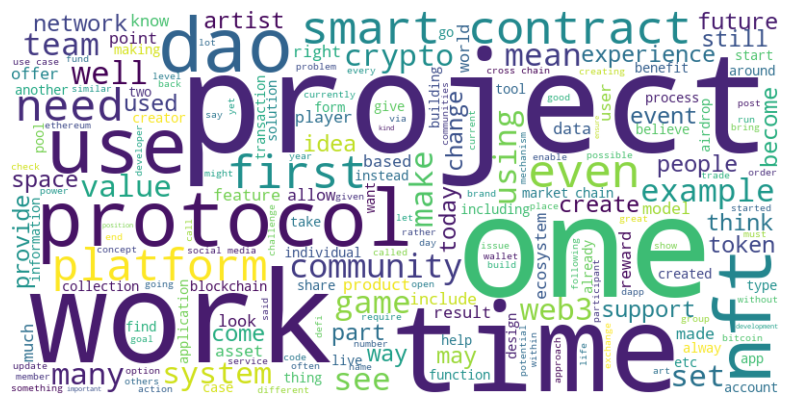

In [57]:
#counter top10 parole più frequenti
from collections import Counter

#creo una stringa unica con le parole di tutti i post, sostituendo gli eventuali NaN con stringhe vuote e convertengo tutto sempre in stringa
text = ' '.join(df['cleaned_text'].fillna('').astype(str))
#creo una lista di parole con text.split() e applico Counter per contare la frequenza di ogni elemento della lista (quindi di ogni parola)
word_counts = Counter(text.split())
#stampo le 10 parole più comuni
print(word_counts.most_common(10))

#wordcloud delle parole
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#creo un wordcloud sulla base della stringa unica prima generata
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Noto che nelle parole più frequenti ci sono tanti numeri: li rimuovo per ottenere, auspicabilmente, delle parole frequenti più esplicative.
Per farlo riprendo il codice di prima e lo modifico in modo da rimuovere i numeri in cleaned_title e cleaned_body, e poi vado a sostituire di nuovo cleaned_text con i nuovi cleaned_title e cleaned_body. Nel farlo, inoltre, filtro anche tutte le parole di lunghezza 1, in quanto quasi sicuramente poco informative.

In [60]:
import pandas as pd
import re

#funzione per pulire il testo dai numeri
def clean_text_numbers(text):
    #rimuovo i numeri "numerici" e non "in parole" (quindi 1, 2, 3, etc... ma non "one", "two", etc...)
    text = re.sub(r'\b\d+\b', '', text)
    #rimuovo anche le occorrenze dei numeri "in parole" più comuni, e per farlo creo una lista e utilizzo quella
    number_words = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "hundred", "thousand", "million"]
    for word in number_words:
        text = text.replace(word, "")
    #rimuovo le parole con lunghezza 1
    text = ' '.join([word for word in text.split() if len(word) > 1])
    return text

#lascio il resto del codice uguale, ma applico le funzioni già su cleaned_title e cleaned_body invece che su title e body

#funzione per contare il numero di parole
def word_count(text):
    if pd.isna(text):
        return 0
    return len(text.split())

#calcolo e stampo il numero di parole in title e body prima dell'applicazione della funzione di pulizia
original_body_word_count = df['cleaned_body'].apply(word_count).sum()
original_title_word_count = df['cleaned_title'].apply(word_count).sum()
print("Numero di parole prima della pulizia:")
print("Body:", original_body_word_count)
print("Title:", original_title_word_count)

#applico la funzione di pulizia su title e body
df['cleaned_body'] = df['cleaned_body'].apply(clean_text_numbers)
df['cleaned_title'] = df['cleaned_title'].apply(clean_text_numbers)

#calcolo e stampo il numero di parole in title e body dopo l'applicazione della funzione di pulizia
cleaned_body_word_count = df['cleaned_body'].apply(word_count).sum()
cleaned_title_word_count = df['cleaned_title'].apply(word_count).sum()
print("\nNumero di parole dopo la pulizia:")
print("Body pulito:", cleaned_body_word_count)
print("Title pulito:", cleaned_title_word_count)

Numero di parole prima della pulizia:
Body: 11010329
Title: 115293

Numero di parole dopo la pulizia:
Body pulito: 10517993
Title pulito: 107700


In [62]:
#lascio anche il codice per ricalcolare cleaned_text uguale

#calcolo e stampo il numero totali di caratteri nella colonna cleaned_text
total_chars_before = df['cleaned_text'].str.len().sum()
print("Numero di caratteri nella colonna cleaned_text prima dell'aggiornamento: " + str(total_chars_before))

#aggiorno cleaned_text unendo cleaned_title e cleaned_body
df['cleaned_text'] = (df['cleaned_title'] + ' ' + df['cleaned_body']).str.lower()
#calcolo e stampo il numero totali di caratteri nella colonna cleaned_text adesso, dopo la modifica
total_chars_after = df['cleaned_text'].str.len().sum()
print("Numero di caratteri nella colonna cleaned_text dopo l'aggiornamento: " + str(total_chars_after))

Numero di caratteri nella colonna cleaned_text prima dell'aggiornamento: 82940703
Numero di caratteri nella colonna cleaned_text dopo l'aggiornamento: 80874709


[('new', 43003), ('nft', 39295), ('like', 38019), ('users', 37999), ('community', 37769), ('also', 33549), ('time', 32176), ('web3', 31602), ('chain', 30534), ('token', 28135)]


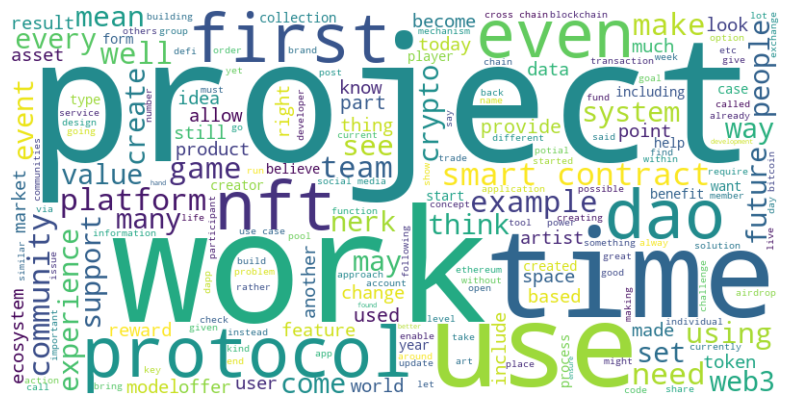

In [64]:
#rifaccio le analisi di parole più frequenti e di wordcloud

#counter top10 parole più frequenti
from collections import Counter

#creo una stringa unica con le parole di tutti i post, sostituendo gli eventuali NaN con stringhe vuote e convertengo tutto sempre in stringa
text = ' '.join(df['cleaned_text'].fillna('').astype(str))
#creo una lista di parole con text.split() e applico Counter per contare la frequenza di ogni elemento della lista (quindi di ogni parola)
word_counts = Counter(text.split())
#stampo le 10 parole più comuni
print(word_counts.most_common(10))

#wordcloud delle parole
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#creo un wordcloud sulla base della stringa unica prima generata
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [65]:
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,timestamp,title,year,month,day,weekday,cleaned_text,language,cleaned_body,cleaned_title
0,https://opensea.io/assets/optimism/0x96c200ec4...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,73.830,107,105,0.690,0x96c200ec4cca0bc57444cfee888cfba78a1ddbd8,lore-7-miberamaker-design-document,[2.5],2024-01-29,...,1.706545e+09,Lore 7 ♡ MiberaMaker Design Document,2024,1,29,Monday,lore miberamaker design document set full set ...,en,set full set sets gets redacted follow miberam...,lore miberamaker design document
1,https://opensea.io/assets/optimism/0x7988434e1...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,52.080,124,122,0.420,0x7988434e1469d35fa5f442e649de45d47c3df23c,lore-6-miberamaker-design-document,[2.5],2024-01-22,...,1.705940e+09,Lore 6 ♡ MiberaMaker Design Document,2024,1,22,Monday,lore miberamaker design document set full set ...,en,set full set sets gets redacted follow miberam...,lore miberamaker design document
2,https://opensea.io/assets/optimism/0x093312465...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,23.982,571,497,0.042,0x093312465e593c65b1f00e0ab8c5885634b2aa83,berafi-bong-bears-x-nftfi,"[2.5, 10.0]",2023-02-23,...,1.677133e+09,BeraFi: Bong Bears x NFTFi,2023,2,23,Thursday,berafi bong bears nftfi baby bear equivalent a...,en,baby bear equivalent article needed beargate i...,berafi bong bears nftfi
3,https://opensea.io/assets/optimism/0x901c2436d...,https://mirror.xyz/0xff5ae9b0a7522736299d797d8...,20.000,10000,9855,0.002,0x901c2436d9d57cb8c0fc47d10e30c0c5be943dcb,announcing-the-results-of-retropgf-2,"[2.5, 10.0]",2023-03-30,...,1.680190e+09,Announcing the Results of RetroPGF 2,2023,3,30,Thursday,announcing results retropgf rewarding positive...,en,rewarding positive impact fueling ecosystem gr...,announcing results retropgf
4,https://opensea.io/assets/optimism/0xe53f95be1...,https://mirror.xyz/0x000002c34bae6dd7bec72acba...,20.000,10000,9144,0.002,0xe53f95be16ee1d2a6a6afb3eedbb9969d337dea7,syncswap-era-testnet-is-now-live,"[2.5, 10.0]",2023-03-01,...,1.677645e+09,SyncSwap Era ∎ Testnet is now live,2023,3,1,Wednesday,syncswap era testnet live wait excited announc...,en,wait excited announce syncswap era testnet liv...,syncswap era testnet live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26874,https://opensea.io/assets/optimism/0xe6aa6aaf3...,https://mirror.xyz/0x75aaf4a296c7e115c5757f936...,0.000,14,14,0.000,0xe6aa6aaf3ba199a09042cd00fb0052fa9d6f33c0,superseed-joins-the-superchain,[2.5],2024-10-15,...,1.729007e+09,Superseed Joins the Superchain,2024,10,15,Tuesday,superseed joins superchain today excited annou...,en,today excited announce superseed officially jo...,superseed joins superchain
26875,https://opensea.io/assets/optimism/0xe82941552...,https://mirror.xyz/0x8073639b11994c549eda58fc3...,0.000,2,2,0.000,0xe829415523b4d89361116dde50a5eb841b60c71a,gr15-how-to-donate-to-gitcoin-grants,[2.5],2023-06-27,...,1.662864e+09,GR15: How to Donate to Gitcoin Grants,2023,6,27,Tuesday,gr15 donate gitcoin grants guide first time fu...,en,guide first time funders especially new web3 g...,gr15 donate gitcoin grants
26876,https://opensea.io/assets/optimism/0x0eedbed03...,https://mirror.xyz/0x179b847833532783f84667ece...,0.000,1,1,0.000,0x0eedbed0325298e6b42d4b1904e42ecc8f40041e,good-project-pnkzyk1jmu,"[2.5, 10.0]",2023-02-05,...,1.675623e+09,good project,2023,2,5,Sunday,good project project interesting,en,project interesting,good project
26877,https://opensea.io/assets/optimism/0x440f392c7...,https://mirror.xyz/0x6babf8a88741f75eb09e3a81f...,0.000,2,1,0.000,0x440f392c7c01dfc3b64c635f3dca3794439b44d0,kazakhstan-forbids,"[2.5, 10.0]",2023-02-10,...,1.676025e+09,Kazakhstan forbids!,2023,2,10,Friday,kazakhstan forbids kazakhstan banned russians ...,en,kazakhstan banned russians foreigners living c...,kazakhstan forbids


In [68]:
#salvo il df pulito per poterlo riutilizzare
df.to_csv('mirrorPublications_cleaned.csv', index=False)